**SIMULATED ANNEALING ALGORITHM**

**EIL 51 Dataset (Optimal Solution - 426)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

**Define Coordinate Class**

In [ ]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate Euclidean distance between two coordinates
    @staticmethod
    def get_distance(a, b):
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    #Compute total distance for a given route
    @staticmethod
    def get_total_distance(coords):
        dist = sum(Coordinate.get_distance(a, b) for a, b in zip(coords[:-1], coords[1:]))
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

**Load Dataset**

In [ ]:
coordinates = [
        (37, 52), (49, 49), (52, 64), (20, 26), (40, 30), (21, 47), (17, 63), (31, 62),
        (52, 33), (51, 21), (42, 41), (31, 32), (5, 25), (12, 42), (36, 16), (52, 41),
        (27, 23), (17, 33), (13, 13), (57, 58), (62, 42), (42, 57), (16, 57), (8, 52),
        (7, 38), (27, 68), (30, 48), (43, 67), (58, 48), (58, 27), (37, 69), (38, 46),
        (46, 10), (61, 33), (62, 63), (63, 69), (32, 22), (45, 35), (59, 15), (5, 6),
        (10, 17), (21, 10), (5, 64), (30, 15), (39, 10), (32, 39), (25, 32), (25, 55),
        (48, 28), (56, 37), (30, 40)
    ]


**Simulated Annealing Algorithm**

In [ ]:
#SA params: 
# T0 = initial temperature
# r = cooling rate 
# max_iterations = max number of iterations

def Simulated(T0=40000, r=0.80, max_iterations=1000):

    #Turns dataset into Coordinate objects
    coords = [Coordinate(x, y) for x, y in coordinates]

    best_route = coords[:]
    best_distance = Coordinate.get_total_distance(coords)

    start_time = time.time()
    T = T0

    for _ in range(max_iterations):
        L = np.random.randint(10, 31)
        for _ in range(L):
            r1, r2 = np.random.randint(0, len(coords), size=2) 
            coords[r1], coords[r2] = coords[r2], coords[r1]

            current_distance = Coordinate.get_total_distance(coords) #swap cities

            #Acceptance probability
            if current_distance < best_distance or np.random.uniform() < np.exp((best_distance - current_distance) / T):
                best_distance = current_distance
                best_route = coords[:]
            else:
                coords[r1], coords[r2] = coords[r2], coords[r1] #revert swap

        T *= r
    
    best_route.append(best_route[0])

    end_time = time.time()
    cpu_time = end_time - start_time

    best_tour_indices = [coordinates.index((c.x, c.y)) for c in best_route]

    print(f"Best Tour: {best_tour_indices}")
    print(f"Best Length: {best_distance:.2f}")
    print(f"CPU Time: {cpu_time:.4f} seconds")

    fig, ax = plt.subplots(figsize=(10, 6))

    for first, second in zip(best_route[:-1], best_route[1:]):
        ax.plot([first.x, second.x], [first.y, second.y], 'b')
    ax.plot([best_route[0].x, best_route[-1].x], [best_route[0].y, best_route[-1].y], 'b')

    for i, c in enumerate(best_route):
        ax.plot(c.x, c.y, 'ro')
        ax.text(c.x + 1, c.y + 1, f'{i}', color='black', fontsize=8)

    ax.set_title('Simulated Annealing for Symmetric TSP')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    plt.show()


Simulations

1st

Best Tour: [17, 3, 43, 14, 44, 48, 4, 36, 16, 11, 0, 21, 19, 34, 35, 2, 27, 30, 7, 47, 22, 23, 42, 6, 25, 28, 20, 33, 29, 9, 38, 32, 41, 18, 39, 40, 12, 46, 50, 45, 10, 37, 8, 49, 15, 1, 31, 26, 5, 13, 24, 17]
Best Length: 538.81
CPU Time: 1.8063 seconds


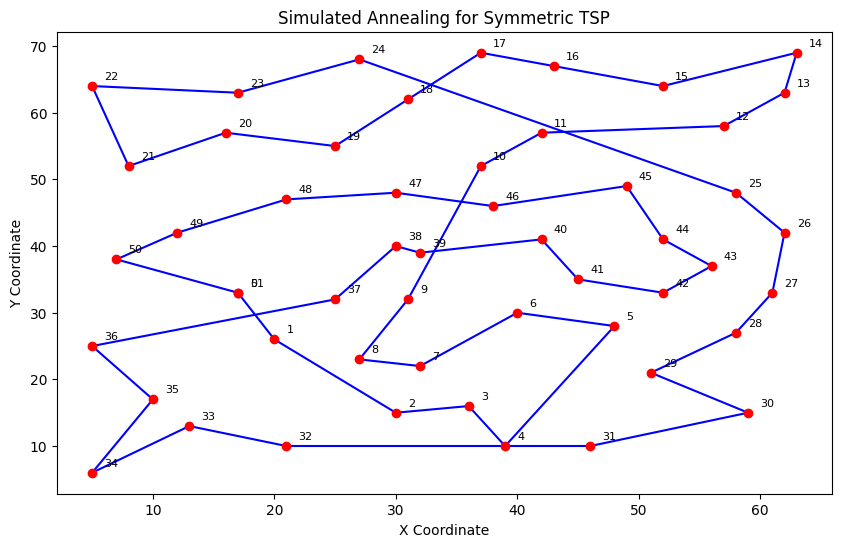

In [15]:
Simulated()

2nd

Best Tour: [9, 43, 41, 39, 18, 16, 36, 14, 44, 32, 38, 29, 33, 8, 48, 37, 4, 11, 46, 17, 13, 23, 42, 22, 6, 25, 27, 35, 2, 0, 26, 50, 31, 1, 28, 20, 34, 19, 10, 45, 3, 40, 12, 24, 5, 47, 7, 30, 21, 15, 49, 9]
Best Length: 586.41
CPU Time: 2.1918 seconds


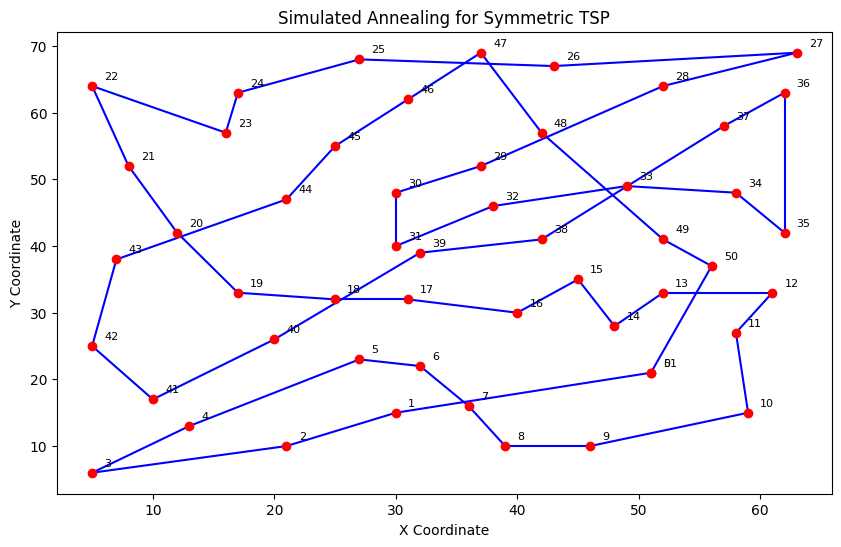

In [16]:
Simulated()

3rd

Best Tour: [19, 28, 1, 31, 0, 26, 46, 17, 6, 25, 47, 5, 13, 24, 12, 40, 3, 23, 42, 22, 50, 45, 11, 4, 36, 16, 18, 39, 41, 43, 14, 44, 32, 38, 9, 48, 15, 21, 27, 30, 7, 10, 37, 8, 29, 33, 49, 20, 34, 35, 2, 19]
Best Length: 574.60
CPU Time: 1.7472 seconds


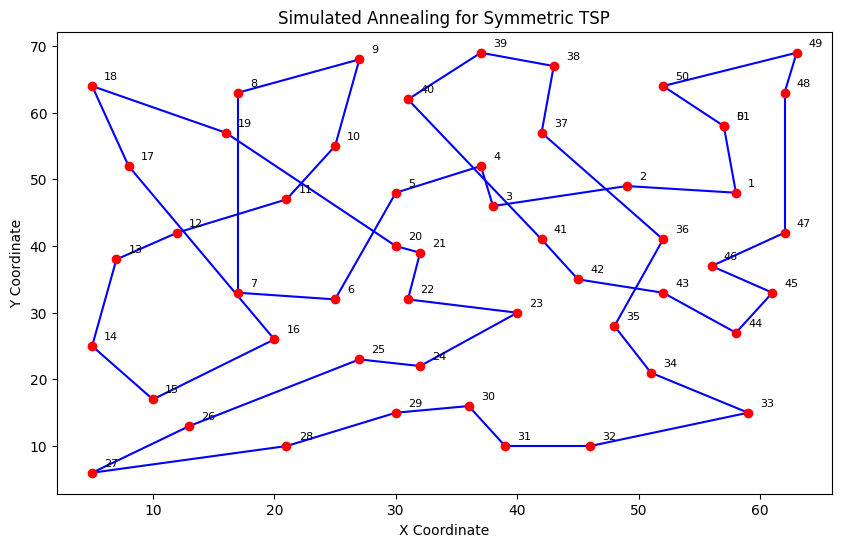

In [17]:
Simulated()

4th

Best Tour: [13, 5, 26, 0, 31, 10, 37, 29, 33, 20, 28, 2, 27, 30, 21, 11, 46, 36, 32, 38, 9, 48, 8, 49, 15, 34, 35, 19, 1, 17, 3, 16, 43, 41, 18, 40, 12, 39, 44, 14, 4, 45, 50, 47, 7, 25, 6, 22, 42, 23, 24, 13]
Best Length: 575.74
CPU Time: 2.0649 seconds


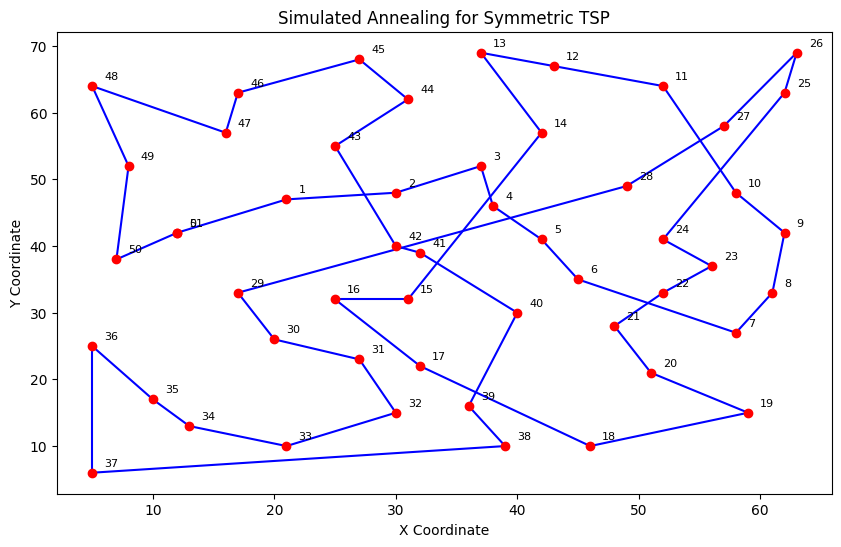

In [18]:
Simulated()

5th

Best Tour: [44, 43, 41, 18, 39, 40, 12, 17, 25, 30, 7, 0, 21, 27, 2, 35, 34, 19, 28, 1, 15, 38, 9, 45, 50, 26, 47, 22, 6, 42, 23, 24, 13, 5, 31, 10, 37, 8, 49, 20, 33, 29, 48, 4, 11, 46, 3, 16, 36, 14, 32, 44]
Best Length: 521.48
CPU Time: 2.1169 seconds


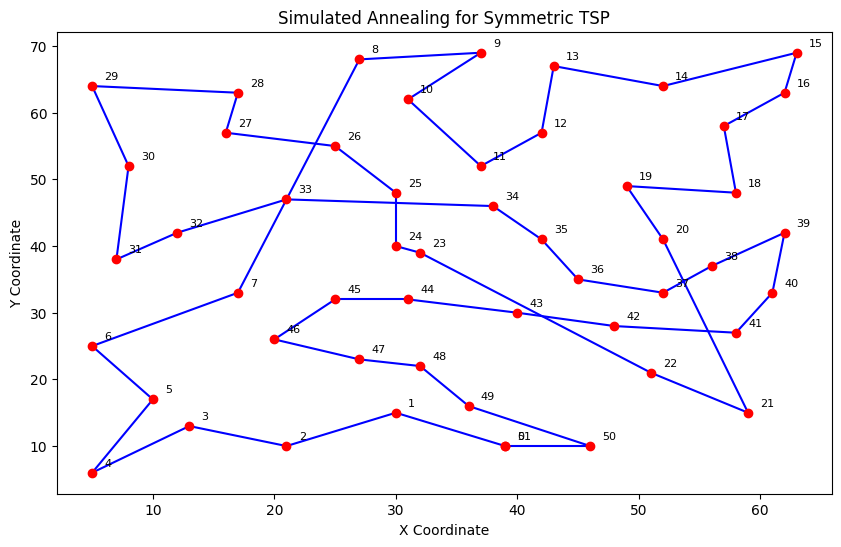

In [19]:
Simulated()

6th

Best Tour: [1, 0, 22, 42, 6, 21, 34, 35, 2, 27, 30, 25, 7, 47, 26, 40, 39, 18, 3, 50, 45, 31, 10, 37, 44, 32, 38, 9, 48, 4, 11, 17, 12, 24, 13, 23, 5, 46, 16, 36, 41, 43, 14, 29, 33, 49, 8, 15, 20, 28, 19, 1]
Best Length: 598.48
CPU Time: 2.0962 seconds


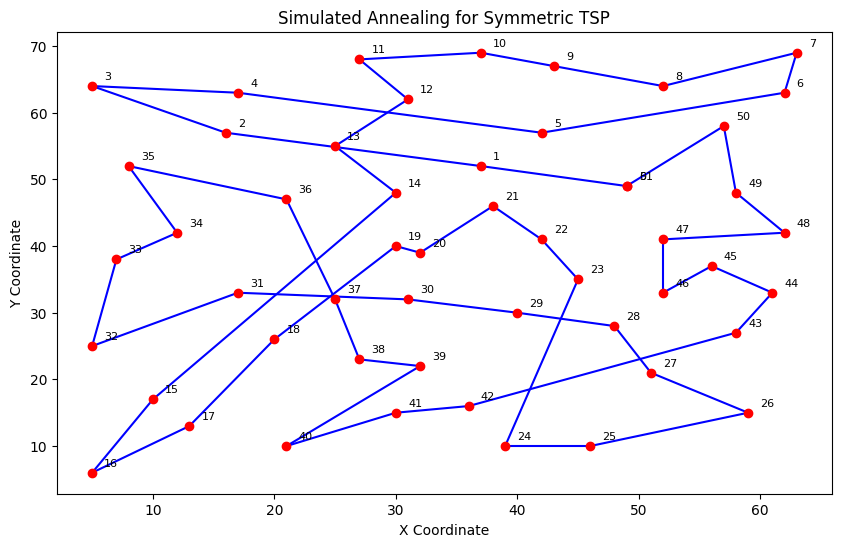

In [20]:
Simulated()

7th

Best Tour: [8, 48, 4, 36, 43, 41, 16, 45, 31, 21, 2, 27, 30, 7, 25, 6, 42, 23, 24, 13, 5, 22, 47, 26, 50, 11, 14, 44, 32, 38, 9, 29, 33, 20, 28, 15, 37, 10, 46, 3, 40, 18, 39, 12, 17, 0, 35, 34, 19, 1, 49, 8]
Best Length: 556.07
CPU Time: 2.6511 seconds


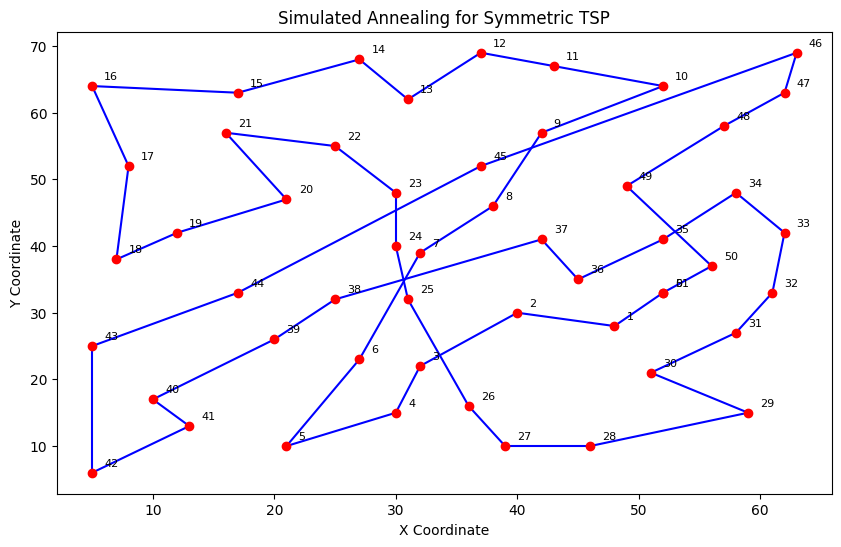

In [21]:
Simulated()

8th

Best Tour: [38, 29, 8, 30, 27, 28, 20, 33, 49, 15, 5, 47, 6, 25, 7, 0, 31, 10, 37, 4, 14, 44, 41, 43, 36, 16, 46, 3, 40, 18, 39, 12, 23, 42, 22, 13, 24, 17, 11, 1, 19, 34, 35, 2, 21, 26, 50, 45, 48, 9, 32, 38]
Best Length: 605.83
CPU Time: 1.8729 seconds


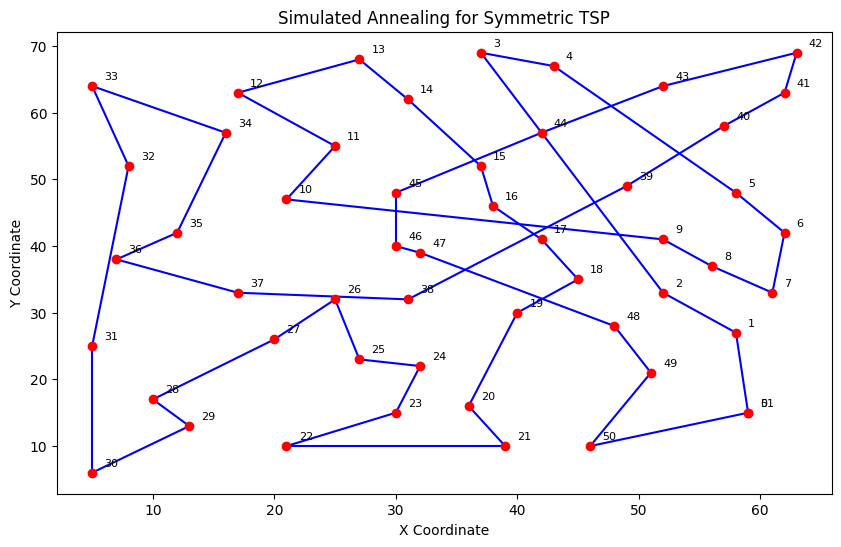

In [22]:
Simulated()

9th

Best Tour: [41, 43, 36, 11, 31, 19, 34, 35, 2, 27, 21, 0, 45, 3, 18, 39, 40, 12, 24, 42, 23, 13, 17, 46, 50, 5, 22, 6, 25, 30, 7, 47, 26, 14, 44, 32, 4, 37, 15, 8, 48, 9, 38, 29, 33, 49, 20, 28, 1, 10, 16, 41]
Best Length: 576.29
CPU Time: 1.6298 seconds


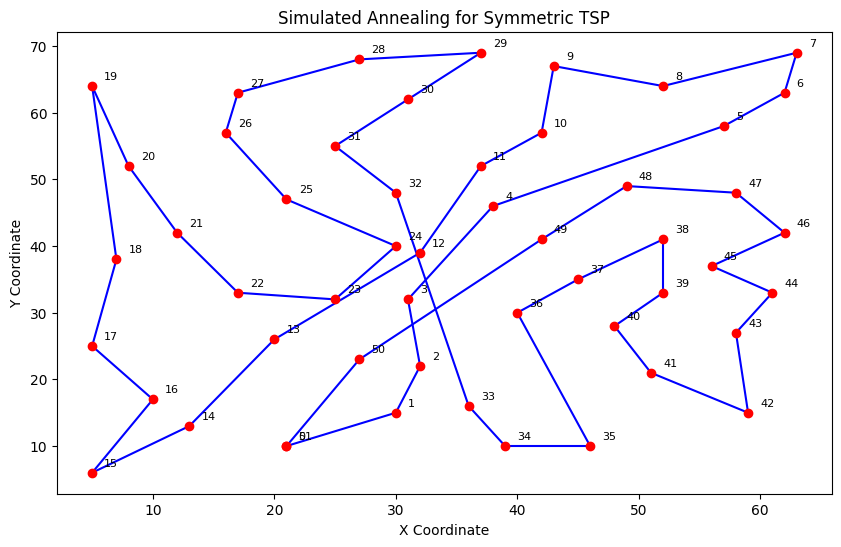

In [23]:
Simulated()

10th

Best Tour: [18, 41, 43, 44, 14, 36, 37, 8, 29, 33, 49, 45, 50, 11, 4, 48, 32, 38, 9, 20, 28, 19, 34, 35, 2, 27, 30, 0, 31, 10, 15, 1, 21, 7, 25, 26, 46, 16, 3, 17, 5, 47, 22, 6, 42, 23, 13, 24, 12, 40, 39, 18]
Best Length: 531.30
CPU Time: 1.6626 seconds


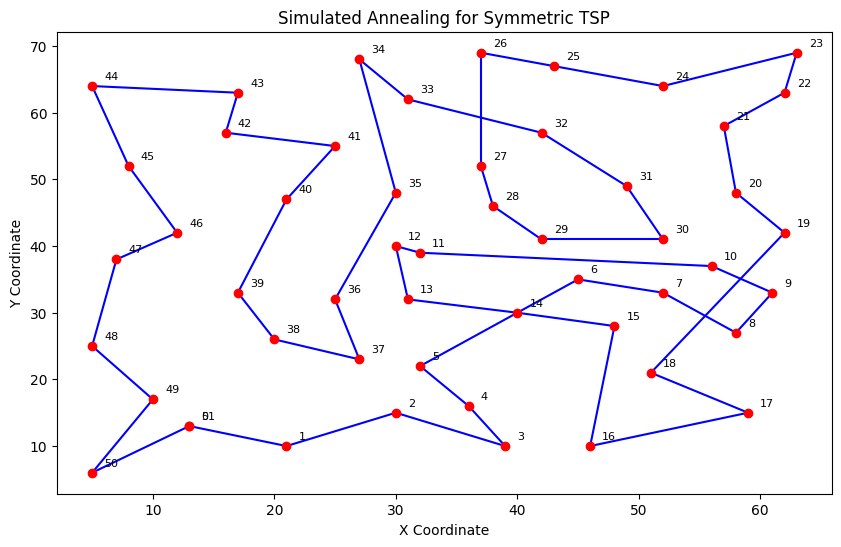

In [24]:
Simulated()